In [23]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

#Models
from sklearn.linear_model import LinearRegression, ElasticNet, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

#Metrics evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score, accuracy_score, classification_report

from sklearn.preprocessing import LabelEncoder

# Spliting data set
from sklearn.model_selection import train_test_split, cross_validate, KFold

#Time series model
from statsmodels.tsa.arima.model import ARIMA

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("African_crises_dataset.csv")

In [9]:
df.head()

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_number                   1059 non-null   int64  
 1   country_code                     1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [11]:
# Encode Label

df["banking_crisis"] = df["banking_crisis"].map({"crisis":1, "no_crisis":0})

In [12]:
df.head()

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,1
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,0
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,0
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,0
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,0


### Drop Columns

In [13]:
df.drop(["country_code", "country"],  axis=1, inplace=True)

In [14]:
df.head(1)

,country_number,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,1


### Check if data is imbalanced

In [15]:
df["banking_crisis"].value_counts()

banking_crisis
0    965
1     94
Name: count, dtype: int64

### Select Features and Labels

In [19]:
x= df.drop(["banking_crisis"], axis=1)
y = df["banking_crisis"]

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

### Train the model

In [24]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(x_train, y_train)

,n_estimators,500
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [26]:
cross_validate(rf, x_train, y_train, cv=5)

{'fit_time': array([0.89343572, 0.86692905, 0.98440242, 1.03431463, 0.95328355]),
 'score_time': array([0.03520751, 0.03128362, 0.03780389, 0.04969525, 0.04995489]),
 'test_score': array([0.97058824, 0.97647059, 0.99408284, 0.98224852, 0.98224852])}

In [27]:
y_pred = rf.predict(x_test)

### Evaluation

In [30]:
acc = accuracy_score(y_test, y_pred)

print(f"The Model's accuracy is {acc*100:.2f}%")

The Model's accuracy is 99.06%


### Classification Report

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       187
           1       1.00      0.92      0.96        25

    accuracy                           0.99       212
   macro avg       0.99      0.96      0.98       212
weighted avg       0.99      0.99      0.99       212



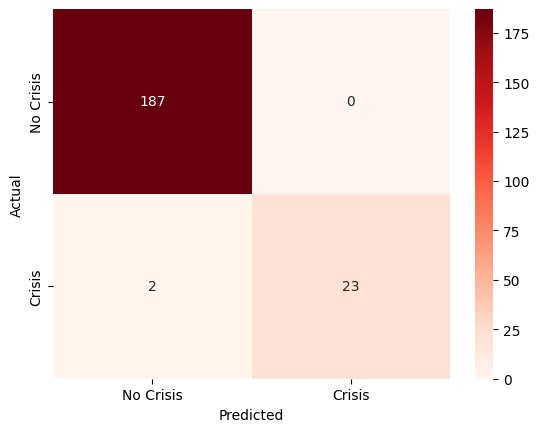

In [33]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

#Plot heatmap with "Yes" and "No" labels
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Reds',
           xticklabels=['No Crisis', 'Crisis'], yticklabels=['No Crisis', 'Crisis'])

plt.show()